How do you load and run inference on a custom image using the YOLOv8 model?

In [13]:
#!pip install ultralytics
#!pip install torchvision


In [8]:
from ultralytics import YOLO
#import the yolov8
model = YOLO("yolov8n.pt")
#loading images
image = r"/content/images/mang.png"
model.predict(image)[0]


image 1/1 /content/images/mang.png: 640x480 (no detections), 179.3ms
Speed: 4.8ms preprocess, 179.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

How do you load the Faster RCNN model with a ResNet50 backbone and print its architecture?

In [17]:
import torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights # Import the enum class


In [18]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 98.9MB/s]


How do you perform inference on an online image using the Faster RCNN model and print the predictions

In [40]:
import cv2
import numpy as np
model.eval()
img = cv2.imread(r"/content/images/mang.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img)
model(img)

How do you load an image and perform inference using YOLOv9, then display the detected objects with
bounding boxes and class labels

In [42]:
#importing yolov9
model = YOLO("yolov9c.pt")

100%|██████████| 49.4M/49.4M [00:01<00:00, 34.9MB/s]



image 1/1 /content/images/download (3).jpeg: 448x640 1 person, 2 cars, 1 bus, 2 trucks, 1 clock, 1949.0ms
Speed: 5.7ms preprocess, 1949.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


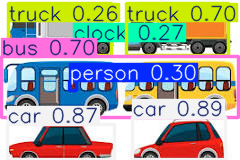

In [47]:
image = r"/content/images/download (3).jpeg"
model.predict(image)[0].show()

How do you display bounding boxes for the detected objects in an image using Faster RCNN

In [54]:
cont = model.predict(image)


image 1/1 /content/images/download (3).jpeg: 448x640 1 person, 2 cars, 1 bus, 2 trucks, 1 clock, 1442.3ms
Speed: 7.9ms preprocess, 1442.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


In [79]:
import cv2

In [85]:
frame = r"/content/images/transport-logistic-set-vehicles_24877-54157.avif"
frame = cv2.imread(frame)
# frame = np.array(frame)
for box in cont[0].boxes:
  x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
  class_id = int(box.cls)
  class_name = cont[0].names[class_id]
  confidence = box.conf.item()
  # Draw rectangle and label on the frame
  cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
  label = f"{class_name}: {confidence:.2f}"
  cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # Display the frame with detections
cv2.imshow("YOLO Webcam Detection", frame)

How do you perform inference on a local image using Faster RCNN

In [ ]:
def make_inference(img, model):
  result = model.predict(img)
  img_array = cv2.imread(img)
  for box in result[0].boxes:
    x1, x2, y1, y2 = box.xyxy.to_list()[0]
    class_id = int(box.cls)
    class_name = cont[0].names[class_id]
    confidence = box.conf.item()
  # Draw rectangle and label on the frame
    cv2.rectangle(img_array, (x1, y1), (x2, y2), (0, 255, 0), 2)
    label = f"{class_name}: {confidence:.2f}"
    cv2.putText(img_array, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return img_array


 How do you perform inference on a local image using Faster RCNN

In [ ]:
frame = r"/content/images/transport-logistic-set-vehicles_24877-54157.avif"
frame = cv2.imread(frame)
# frame = np.array(frame)
for box in cont[0].boxes:
  x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
  class_id = int(box.cls)
  class_name = cont[0].names[class_id]
  confidence = box.conf.item()
  # Draw rectangle and label on the frame
  cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
  label = f"{class_name}: {confidence:.2f}"
  cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # Display the frame with detections
cv2.imshow("YOLO Webcam Detection", frame)

How can you change the confidence threshold for YOLO object detection and filter out low-confidence
predictions

In [ ]:
frame = r"/content/images/transport-logistic-set-vehicles_24877-54157.avif"
frame = cv2.imread(frame)
# frame = np.array(frame)
for box in cont[0].boxes:
  x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
  class_id = int(box.cls)
  class_name = cont[0].names[class_id]
  confidence = box.conf.item()
  if confidence < .8:
            continue
  # Draw rectangle and label on the frame
  cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
  label = f"{class_name}: {confidence:.2f}"
  cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # Display the frame with detections
cv2.imshow("YOLO Webcam Detection", frame)


 How do you perform inference on multiple images from a local folder using Faster RCNN and display the
bounding boxes for each

In [82]:
folder_name = "folder_name"
import os

In [84]:
def make_inference(folder_name , model):
  for img in os.listdir(folder_name):
    img_path = os.path.join(folder_name, img)
    result = make_inference(img_path, model) # make_inferernce in above
    return result

How do you visualize the confidence scores alongside the bounding boxes for detected objects using Faster
RCNN

In [ ]:
frame = r"/content/images/transport-logistic-set-vehicles_24877-54157.avif"
frame = cv2.imread(frame)
# frame = np.array(frame)
for box in cont[0].boxes:
  x1, y1, x2, y2 = map(int, box.xyxy.tolist()[0])
  class_id = int(box.cls)
  class_name = cont[0].names[class_id]
  confidence = box.conf.item()
  if confidence < .8:
            continue
  # Draw rectangle and label on the frame
  cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
  label = f"{class_name}: {confidence:.2f}"
  cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # Display the frame with detections
cv2.imshow("YOLO Webcam Detection", frame)

How can you save the inference results (with bounding boxes) as a new image after performing detection
using YOLO

In [ ]:
result = make_inference(image, model)
cv2.save(frame)